In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from qutip import *
import laser

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser

## 11.1 Equation of Motion for the Density Matrix of the Cavity Field 

In [2]:
# parameters
w_c = 2.0 * np.pi
w_a = 2.0 * np.pi
g = 0.01 * 2 * np.pi

gamma = 0.01
kappa = 0.01
ra = 0.4

In [3]:
laser1 = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [4]:
laser1.get_atom_cavity_args()

{'g': 0.06283185307179587,
 'gamma': 0.01,
 'kapa': 0.01,
 'ra': 0.4,
 'w_a': 6.283185307179586,
 'w_c': 6.283185307179586}

In [5]:
laser1.A, laser1.B, laser1.BdA

(31.58273408348595, 4987.345460940925, 157.91367041742973)

In [6]:
laser1.steady_average_n()

19.993667426022355

In [7]:
N_max = 80
t_list = 0.02 * 2 * np.pi / w_c * np.arange(40000)
pn_0 = np.zeros(N_max)
pn_0[0] = 1

In [8]:
result2 = laser1.evolution(t_list, N_max, eq='pn', init_pn=pn_0)

In [9]:
aver_n = [sum(vec * range(N_max)) for vec in result2]

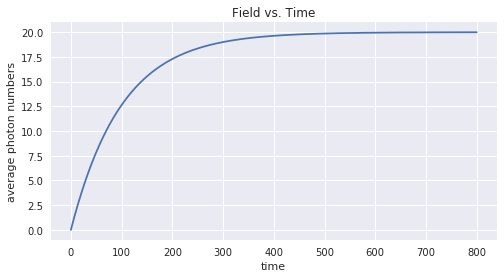

In [14]:
plt.figure(figsize=(8,4))
plt.plot(t_list, aver_n)
plt.xlabel("time")
plt.ylabel("average photon numbers")
plt.title("Field vs. Time");

In [11]:
ne = laser1.A**2/laser1.kappa/laser1.B
n_list = np.arange(N_max)
pn_list = [np.exp(-ne) * ne**n / np.math.factorial(n) for n in n_list]

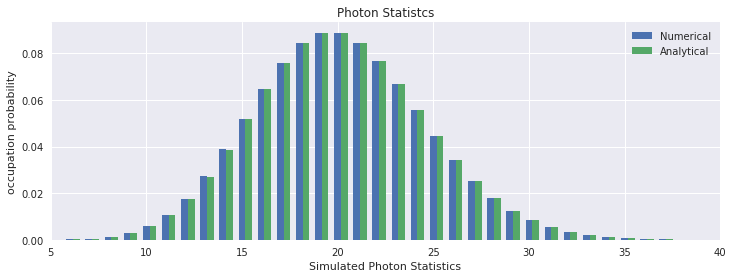

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(n_list, result2[-1], width=0.35, label="Numerical")
ax.bar(n_list + 0.35, pn_list, width=0.35, label="Analytical")
plt.xlabel("Simulated Photon Statistics")
plt.ylabel("occupation probability")
plt.title("Photon Statistcs")
plt.legend()
plt.xlim(5, 40);